In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("fct_invoice.csv")

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [45]:
jdf = pd.read_json("dim_customer.json")

jdf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [66]:
# EASY 1

df.nunique()

invoice_no        99457
customer_id        5191
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [12]:
# EASY 2

pd.Series(df['category'].unique())

0           Clothing
1              Shoes
2              Books
3          Cosmetics
4    Food & Beverage
5               Toys
6         Technology
7           Souvenir
dtype: object

In [19]:
# EASY 3 (JK)
# LOL THIS WAS SCRATCH
print("Credit Card: " + str(df['payment_method'].value_counts()['Credit Card']))
print("Debit Card: " + str(df['payment_method'].value_counts()['Debit Card']))
print("Cash: " + str(df['payment_method'].value_counts()['Cash']))
print(df['payment_method'].value_counts())

Credit Card: 34931
Debit Card: 20079
Cash: 44447
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [21]:
# EASY 3 (REAL)
df['payment_method'].value_counts()
#value_counts counts the number of it 

if df['payment_method'].value_counts()['Credit Card'] > (df['payment_method'].value_counts()['Debit Card'] and 
                                                         df['payment_method'].value_counts()['Cash']):
    print("Credit Card: " + str(df['payment_method'].value_counts()['Credit Card']))
    
elif df['payment_method'].value_counts()['Debit Card'] > (df['payment_method'].value_counts()['Credit Card'] and 
                                                         df['payment_method'].value_counts()['Cash']):
    print("Debit Card: " + str(df['payment_method'].value_counts()['Debit Card']))
    
else:
    print("Cash: " + str(df['payment_method'].value_counts()['Cash']))

Cash: 44447


In [40]:
#  MEDIUM 1

df[['category', 'price']].groupby('category').sum(['price']).sort_values(by='price', ascending=False).head(3)

,price
category,
Clothing,31075684.64
Shoes,18135336.89
Technology,15772050.00


In [52]:
# scratch 1

jdf_age = jdf.loc[jdf['age'] >= 45,['age','id']]

jdf_age

,age,id
0,48.0,0
2,57.0,2
3,73.0,3
6,83.0,6
10,80.0,10
...,...,...
5181,84.0,8888
5182,48.0,8889
5184,46.0,9150
5185,69.0,9344


In [55]:
# scratch 2
jdf_merge = pd.concat([jdf, df['price']], axis=1)
jdf_merge

,age,first_name,gender,id,last_name,price
0,48.0,Nicholas,M,0.0,Flores,1500.40
1,NaN,Jeffery,M,1.0,Rowe,1800.51
2,57.0,Alexis,F,2.0,Benton,300.08
3,73.0,Amy,F,3.0,Johnson,3000.85
4,20.0,David,M,4.0,Moore,60.60
...,...,...,...,...,...,...
99452,NaN,NaN,NaN,NaN,NaN,58.65
99453,NaN,NaN,NaN,NaN,NaN,10.46
99454,NaN,NaN,NaN,NaN,NaN,10.46
99455,NaN,NaN,NaN,NaN,NaN,4200.00


In [59]:
# MEDIUM 2
jdf_age_sales = jdf_merge.loc[jdf_merge['age']>= 45, ['price']].sum()
jdf_age_sales

price    1222991.04
dtype: float64

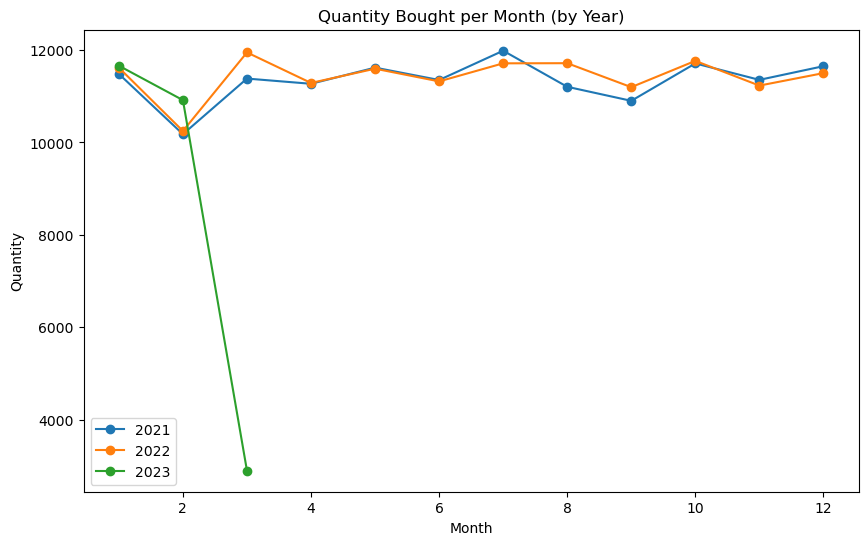

In [69]:
# How is the data distributed across different invoice dates? 
# Are there any seasonal trends or patterns? 
# (Use a graph for this.)
# MEDIUM 3
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

newdf = pd.read_csv('fct_invoice.csv')
newdf['invoice_date'] = pd.to_datetime(newdf['invoice_date'], format='%d/%m/%Y')
newdf['invoice_month'] = newdf['invoice_date'].dt.month
newdf['invoice_year'] = newdf['invoice_date'].dt.year                                                        

newdf.sort_values(['invoice_year','invoice_month'])

experidf = newdf.sort_values(['invoice_year','invoice_month']).copy()

grouped_data = experidf.groupby(['invoice_year', 'invoice_month']).agg({'quantity': 'sum'}).reset_index()
grouped_data.sort_values(['invoice_year', 'invoice_month'], inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

for year in grouped_data['invoice_year'].unique():
    year_data = grouped_data[grouped_data['invoice_year'] == year]
    
    ax.plot(year_data['invoice_month'], year_data['quantity'], label=year, marker='o')

ax.set_xlabel('Month')
ax.set_ylabel('Quantity')

ax.set_title('Quantity Bought per Month (by Year)')

ax.legend()

plt.show()


In [70]:
# HARD

import numpy as np

df1 = pd.read_csv('fct_invoice.csv')
df2 = pd.read_json(r"dim_customer.json")

df1_clean = df1[['customer_id', 'category', 'quantity', 'price']].copy()

df1_clean['age'] = df1_clean['customer_id'].map(df2.set_index('id')['age'])

df1_clean_sorted = df1_clean.sort_values(['category', 'age'])

age_ranges = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

df1_clean_sorted['age_range'] = pd.cut(df1_clean_sorted['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], labels=age_ranges)

df_grouped = df1_clean_sorted.groupby(['category', 'age_range']).agg({'quantity': 'sum', 'price': 'sum'}).reset_index()

pivot = df_grouped.pivot_table(index=['category','age_range'], values=['quantity','price'], aggfunc='sum')

pd.set_option('display.max_rows', None)

pivot

#made with the assistance of ChatGPT

price  quantity
category        age_range                      
Books           10-19         5317.65       351
                20-29        21861.45      1443
                30-39        23058.30      1522
                40-49        22285.65      1471
                50-59        21785.70      1438
                60-69        20513.10      1354
                70-79        15619.65      1031
                80-89         6196.35       409
Clothing        10-19       816817.76      2722
                20-29      2770638.64      9233
                30-39      3118131.28     10391
                40-49      2999599.68      9996
                50-59      2941384.16      9802
                60-69      2724726.40      9080
                70-79      2146772.32      7154
                80-89      1020572.08      3401
Cosmetics       10-19        47897.48      1178
                20-29       162599.34      3999
                30-39       197810.90      4865
                40-49       178172.12      4382
                50-59       171341.24      4214
                60-69       162233.40      3990
                70-79       117263.44      2884
                80-89        59770.20      1470
Food & Beverage 10-19         5580.41      1067
                20-29        20548.67      3929
                30-39        24324.73      4651
                40-49        23236.89      4443
                50-59        21474.38      4106
                60-69        20752.64      3968
                70-79        15135.62      2894
                80-89         6945.44      1328
Shoes           10-19       382908.46       638
                20-29      1686477.70      2810
                30-39      1909140.77      3181
                40-49      1821515.95      3035
                50-59      1699681.44      2832
                60-69      1483020.07      2471
                70-79      1280762.78      2134
                80-89       570761.67       951
Souvenir        10-19         5372.34       458
                20-29        14861.91      1267
                30-39        17442.51      1487
                40-49        17454.24      1488
                50-59        15858.96      1352
                60-69        14251.95      1215
                70-79        10639.11       907
                80-89         5571.75       475
Technology      10-19       459900.00       438
                20-29      1378650.00      1313
                30-39      1687350.00      1607
                40-49      1593900.00      1518
                50-59      1283100.00      1222
                60-69      1455300.00      1386
                70-79      1012200.00       964
                80-89       420000.00       400
Toys            10-19        26808.32       748
                20-29       101821.44      2841
                30-39       116802.56      3259
                40-49       103613.44      2891
                50-59        98452.48      2747
                60-69        92933.12      2593
                70-79        78095.36      2179
                80-89        35230.72       983